In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

import sys
sys.path.insert(1, '../Merging_Data')

import WranglerFunctions as wf
import FullDataset as fd

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
earnings = pd.read_csv('../Datasets/Financial_dataset/F3METL_Comp.csv', index_col=False, encoding = 'unicode_escape')
earnings = wf.F3Metl_Comp_Wrangler(earnings)
earnings

RIO LN Equity                                                      \
                 PX_OPEN   PX_HIGH    PX_LOW   PX_LAST PX_VOLUME      EBITDA   
Dates                                                                          
2000-01-04      1239.156  1243.287  1210.242  1217.677   3585947   1404.1713   
2000-01-05      1210.242  1218.503  1159.024  1163.981   3342568   1404.1713   
2000-01-06      1173.068  1218.503  1173.068  1205.286   9503906   1404.1713   
2000-01-07      1214.373  1226.764  1185.459  1220.982   7508500   1404.1713   
2000-01-10      1224.286  1226.764  1181.329  1193.720   6438418   1404.1713   
...                  ...       ...       ...       ...       ...         ...   
2022-01-25      5312.000  5353.000  5276.000  5311.000   2538309  19744.0000   
2022-01-26      5422.000  5506.000  5388.000  5434.000   2878571  19744.0000   
2022-01-27      5399.000  5623.000  5384.000  5569.000   2943232  19744.0000   
2022-01-28      5628.000  5665.000  5365.000  5386.000   6162008  19744.0000   
2022-01-31      5400.000  5409.000  5178.000  5185.000   3349054  19744.0000   

                    GLEN LN Equity                  ... EVR LN Equity          \
           PE_RATIO        PX_OPEN PX_HIGH  PX_LOW  ...     PX_VOLUME  EBITDA   
Dates                                               ...                         
2000-01-04  25.8338            NaN     NaN     NaN  ...           NaN     NaN   
2000-01-05  24.7820            NaN     NaN     NaN  ...           NaN     NaN   
2000-01-06  25.6770            NaN     NaN     NaN  ...           NaN     NaN   
2000-01-07  25.8881            NaN     NaN     NaN  ...           NaN     NaN   
2000-01-10  25.3255            NaN     NaN     NaN  ...           NaN     NaN   
...             ...            ...     ...     ...  ...           ...     ...   
2022-01-25   6.1803         391.35  395.00  385.55  ...     3070741.0  2061.0   
2022-01-26   6.3346         394.65  406.00  393.55  ...     2865499.0  2061.0   
2022-01-27   6.4205         393.85  408.25  389.95  ...     2745585.0  2061.0   
2022-01-28   6.2169         402.00  403.00  389.85  ...     3847210.0  2061.0   
2022-01-31   6.0059         397.55  398.40  382.10  ...     2175911.0  2061.0   

                    BHP LN Equity                                            \
           PE_RATIO       PX_OPEN PX_HIGH  PX_LOW PX_LAST  PX_VOLUME EBITDA   
Dates                                                                         
2000-01-04      NaN           NaN     NaN     NaN     NaN        NaN   2489   
2000-01-05      NaN           NaN     NaN     NaN     NaN        NaN   2489   
2000-01-06      NaN           NaN     NaN     NaN     NaN        NaN   2489   
2000-01-07      NaN           NaN     NaN     NaN     NaN        NaN   2489   
2000-01-10      NaN           NaN     NaN     NaN     NaN        NaN   2489   
...             ...           ...     ...     ...     ...        ...    ...   
2022-01-25   6.2323           NaN     NaN     NaN     NaN        NaN  20181   
2022-01-26   6.3396           NaN     NaN     NaN     NaN        NaN  20181   
2022-01-27   6.4637           NaN     NaN     NaN     NaN        NaN  20181   
2022-01-28   6.3724           NaN     NaN     NaN     NaN        NaN  20181   
2022-01-31   6.3604        2426.0  2426.0  2341.5  2347.0  5257964.0  20181   

                     
           PE_RATIO  
Dates                
2000-01-04      NaN  
2000-01-05      NaN  
2000-01-06      NaN  
2000-01-07      NaN  
2000-01-10      NaN  
...             ...  
2022-01-25      NaN  
2022-01-26      NaN  
2022-01-27      NaN  
2022-01-28      NaN  
2022-01-31      NaN  

[5760 rows x 42 columns]

In [3]:
RIO_earnings = earnings['RIO LN Equity']['EBITDA'].to_frame()
RIO_earnings

,EBITDA
Dates,
2000-01-04,1404.1713
2000-01-05,1404.1713
2000-01-06,1404.1713
2000-01-07,1404.1713
2000-01-10,1404.1713
...,...
2022-01-25,19744.0000
2022-01-26,19744.0000
2022-01-27,19744.0000


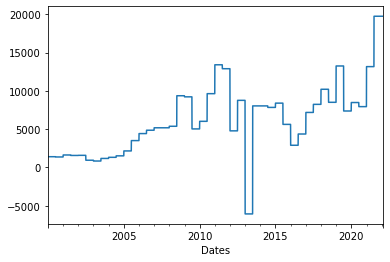

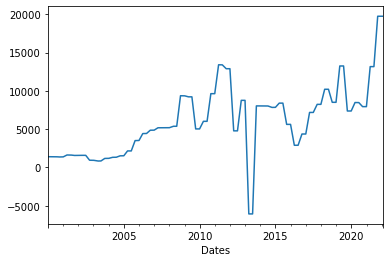

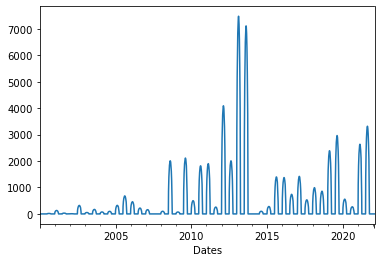

In [4]:
mean = RIO_earnings['EBITDA'].rolling('90D', min_periods=1).mean()
std = RIO_earnings['EBITDA'].rolling('90D', min_periods=1).std()

RIO_earnings['EBITDA'].plot()
plt.show()
mean.plot()
plt.show()
std.plot()
plt.show()

In [5]:
earnings['RIO LN Equity'].loc[earnings['RIO LN Equity']['EBITDA'].drop_duplicates().index].corr()

,PX_OPEN,PX_HIGH,PX_LOW,PX_LAST,PX_VOLUME,EBITDA,PE_RATIO
PX_OPEN,1.000000,0.999850,0.999810,0.999484,-0.239973,0.744303,-0.087795
PX_HIGH,0.999850,1.000000,0.999836,0.999794,-0.237720,0.743561,-0.081101
PX_LOW,0.999810,0.999836,1.000000,0.999784,-0.244345,0.739474,-0.088540
PX_LAST,0.999484,0.999794,0.999784,1.000000,-0.243616,0.739113,-0.078522
PX_VOLUME,-0.239973,-0.237720,-0.244345,-0.243616,1.000000,-0.091089,0.142289
EBITDA,0.744303,0.743561,0.739474,0.739113,-0.091089,1.000000,-0.086170
PE_RATIO,-0.087795,-0.081101,-0.088540,-0.078522,0.142289,-0.086170,1.000000


# LSTM

Code from website below:

https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/

When rerunning code you have to restart the kernel and run from the start.

In [6]:
# inflation_original = pd.read_csv('../Datasets/Economic_dataset/Inflation.csv', index_col = False)
# clean_inflation = wf.Inflation_Unemployment_Wrangler(inflation_original)
# unemployment_original = pd.read_csv('../Datasets/Economic_dataset/Unemployment.csv', index_col = False)
# clean_unemployment, _ = wf.Inflation_Unemployment_Wrangler(unemployment_original)

# def getEBITDAUnique(df, companyName):
#     earnings_unique = df[companyName]['EBITDA'].drop_duplicates()
#     earnings_unique = pd.DataFrame(earnings_unique)
#     earnings_unique = earnings_unique.dropna()
#     earnings_unique = earnings_unique.reset_index()
#     return earnings_unique

# def closest_date(dateList, date, start, end):
#     if start > end:
#         return (start + end) // 2

#     mid = (start + end) // 2
#     if date == dateList[mid]:
#         return mid

#     if date < dateList[mid]:
#         return closest_date(dateList, date, start, mid-1)
#     else:
#         return closest_date(dateList, date, mid+1, end)

# def add_inflation(df, inflation):
#     df['Inflation Rate'] = np.nan
#     i = 0
#     for i in range(len(df)):
#         date = df['Dates'][i]
#         closestInflationDate = closest_date(inflation['Date'], date, 0, len(inflation['Date']))
#         df.loc[i, 'Inflation Rate'] = inflation['Inflation Rate'][closestInflationDate]
#     return df

# def add_Unemployment(df, unemployment):
#     df['Unemployment'] = np.nan
#     i = 0
#     for i in range(len(df)):
#         date = df['Dates'][i]
#         closestDate = closest_date(unemployment['Date'], date, 0, len(unemployment['Date']))
#         df.loc[i, 'Unemployment'] = unemployment['Unemployment Rate'][closestDate]
#     return df

RIO_full = fd.GetFullDatasetForCompany("RIO LN Equity")
RIO_full.index = RIO_full['Date']
RIO_full = RIO_full.drop('Date', axis = 1)
RIO_full

C:\Users\vojno\OneDrive - University of Bristol\Applied Data Science\Mining\Notebooks\Modelling_notebooks\../Merging_Data\WranglerFunctions.py:138: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv(location   , index_col=False, names=["Dates", "PX_LAST"])
C:\Users\vojno\OneDrive - University of Bristol\Applied Data Science\Mining\Notebooks\Modelling_notebooks\../Merging_Data\WranglerFunctions.py:138: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv(location   , index_col=False, names=["Dates", "PX_LAST"])
C:\Users\vojno\OneDrive - University of Bristol\Applied Data Science\Mining\Notebooks\Modelling_notebooks\../Merging_Data\FullDataset.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-

,EBITDA,CL1_COMB_Comodity_PX_LAST,LMAHDS03_LME_Comdty_PX_LAST,LMPBDS03_LME_Comdty_PX_LAST,LMSNDS03_LME_Comdty_PX_LAST,LMCADS03_LME_Comdty_PX_LAST,LMNIDS03_LME_Comdty_PX_LAST,LMCODY_LME_Comdty_PX_LAST,LTBMPRIN_Index_PX_LAST,Inflation Rate,...,SPX500 Index PX_VOLUME,F3METL_PX_LAST,F3METL_PX_VOLUME,GUKG10 Index PX_LAST,BCOMIN_PX_LAST,UK_GDP growth,China_GDP growth,Japan_GDP growth,USA_GDP growth,Shipping costs_Shipping costs
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-04,1404.1713,25.60,1650.0,495.5,6125.0,1169.92932,5250.27881,39125.0,100.00,1.1,...,1.072386e+09,4188.60,9624338.0,5.662,80.1822,1.0,2.4,7.0,1.5,998.2346
2000-06-30,1369.7180,32.50,1580.0,449.0,5510.0,1180.81665,5310.37646,39125.0,100.00,0.8,...,1.258792e+09,2323.00,9624338.0,5.171,76.2545,0.6,2.4,1.9,7.5,998.2346
2001-01-01,1628.6273,26.80,1565.0,483.0,5195.0,1223.13721,4559.14844,39125.0,100.00,0.8,...,1.318392e+09,1697.10,9624338.0,4.881,74.5400,0.9,2.4,3.0,-1.3,998.2346
2001-07-02,1568.2136,26.25,1473.0,453.0,4625.0,1108.59253,4278.52930,39125.0,100.00,1.7,...,1.256211e+09,1480.40,9624338.0,5.302,66.0225,0.5,2.4,-4.3,-1.6,998.2346
2001-12-31,1583.2303,19.84,1355.0,497.0,3940.0,1023.74707,3848.54346,39125.0,100.00,1.1,...,1.089302e+09,1733.20,9624338.0,5.054,58.5132,0.2,2.4,-1.4,1.1,998.2346
2002-07-01,945.0000,26.86,1388.0,461.0,4460.0,1104.12988,4686.17041,39125.0,100.00,0.6,...,1.590400e+09,2112.30,21369987.0,5.010,63.8257,0.7,2.4,1.3,1.6,998.2346
2002-12-31,840.0000,31.20,1350.0,436.0,4280.0,968.64325,4427.19629,39125.0,100.00,1.7,...,1.084224e+09,656.00,2508529.0,4.374,59.2308,0.9,2.4,1.1,0.5,998.2346
2003-06-30,1178.0000,30.19,1365.0,479.0,4650.0,1001.33105,4967.32813,39125.0,100.00,1.1,...,1.353031e+09,2427.00,37377019.0,4.157,62.0931,0.8,2.4,2.8,3.6,998.2346
2003-12-31,1324.0000,32.52,1600.0,724.0,6525.0,1290.23218,9251.99023,39125.0,100.00,1.3,...,8.362977e+08,4854.00,11824331.0,4.802,84.1474,0.8,2.4,4.4,4.7,998.2346


In [7]:
# RIO_unique = getEBITDAUnique(earnings, "RIO LN Equity")
# add_Unemployment(RIO_unique, clean_unemployment)
# add_inflation(RIO_unique, clean_inflation[0])
# RIO_unique.index = RIO_unique["Dates"]
# RIO_unique = RIO_unique.drop("Dates", axis = 1)
# RIO_unique

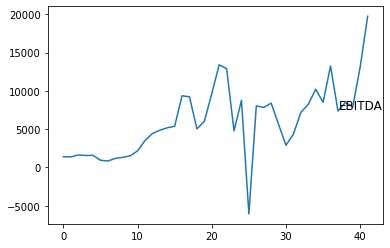

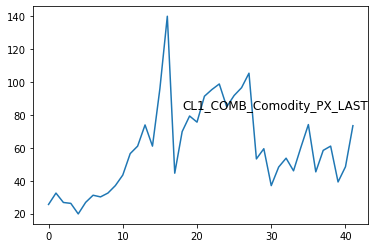

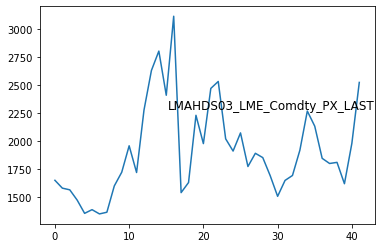

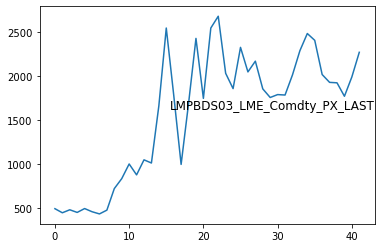

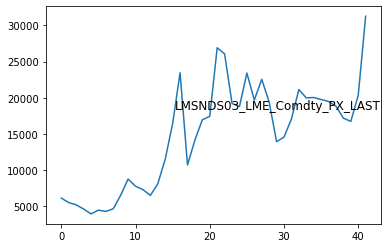

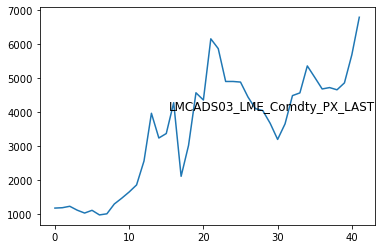

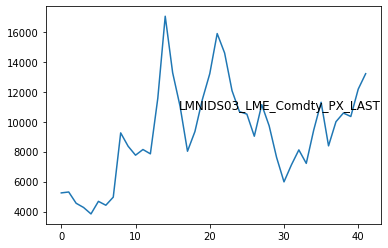

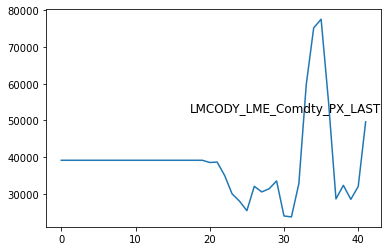

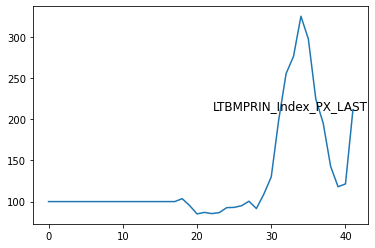

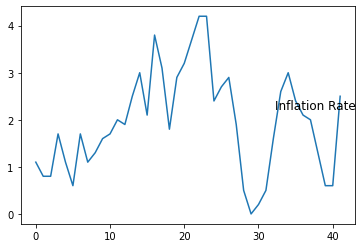

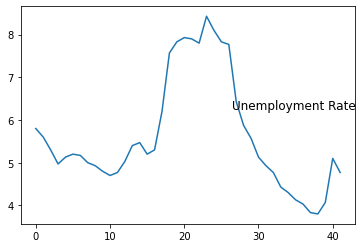

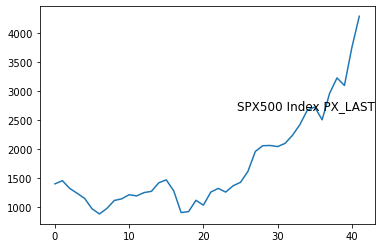

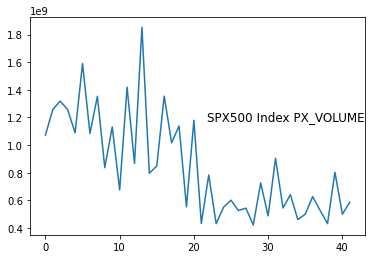

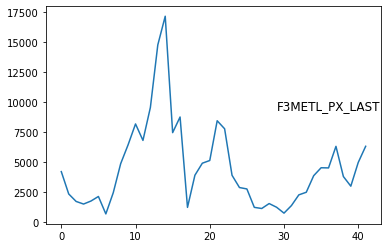

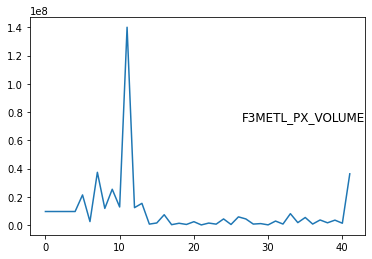

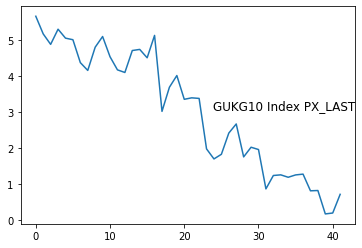

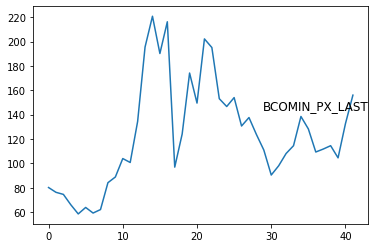

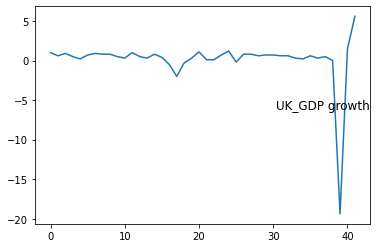

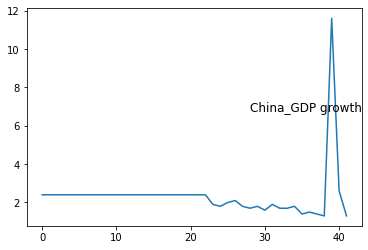

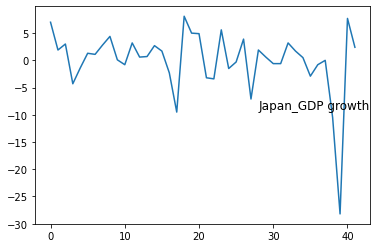

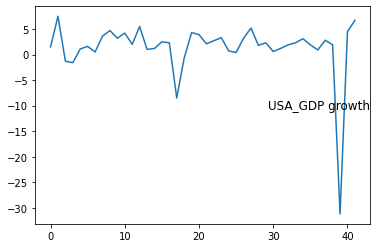

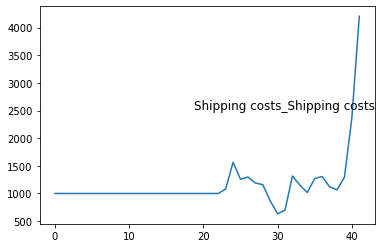

In [8]:
groups = range(len(RIO_full.columns))
i = 1
values = RIO_full.values
# plot each column
# plt.figure()
for group in groups:
#     plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(RIO_full.columns[group], y=0.5, loc='right')
    plt.show()
    i += 1

In [9]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
    
# Lag is number of datapoints it looks previously
lag = 1
reframed = series_to_supervised(scaled, lag, 1)
reframed.drop(reframed.columns[range(len(RIO_full.columns) + 1, 2*len(RIO_full.columns))], axis=1, inplace=True)
print(list(range(len(RIO_full.columns) + 1, 2*len(RIO_full.columns) - 1)))
reframed

[23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]


,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),...,var14(t-1),var15(t-1),var16(t-1),var17(t-1),var18(t-1),var19(t-1),var20(t-1),var21(t-1),var22(t-1),var1(t)
1,0.289429,0.047936,0.170068,0.026468,0.079993,0.034559,0.106346,0.286537,0.062354,0.261905,...,0.213954,0.067804,1.000000,0.133532,0.816,0.106796,0.969697,0.844961,0.103356,0.288094
2,0.288094,0.105360,0.130386,0.005783,0.057478,0.036428,0.110905,0.286537,0.062354,0.190476,...,0.100963,0.067804,0.910565,0.109328,0.800,0.106796,0.829201,1.000000,0.103356,0.298126
3,0.298126,0.057923,0.121882,0.020907,0.045945,0.043694,0.053912,0.286537,0.062354,0.190476,...,0.063055,0.067804,0.857741,0.098763,0.812,0.106796,0.859504,0.772610,0.103356,0.295785
4,0.295785,0.053346,0.069728,0.007562,0.025078,0.024028,0.032622,0.286537,0.062354,0.404762,...,0.049930,0.067804,0.934426,0.046275,0.796,0.106796,0.658402,0.764858,0.103356,0.296367
5,0.296367,0.000000,0.002834,0.027135,0.000000,0.009461,0.000000,0.286537,0.062354,0.261905,...,0.065241,0.067804,0.889253,0.000000,0.784,0.106796,0.738292,0.834625,0.103356,0.271639
6,0.271639,0.058422,0.021542,0.011121,0.019037,0.023262,0.063548,0.286537,0.062354,0.142857,...,0.088202,0.151738,0.881239,0.032737,0.804,0.106796,0.812672,0.847545,0.103356,0.267571
7,0.267571,0.094541,0.000000,0.000000,0.012447,0.000000,0.043901,0.286537,0.062354,0.404762,...,0.000000,0.016955,0.765392,0.004422,0.812,0.106796,0.807162,0.819121,0.103356,0.280666
8,0.280666,0.086135,0.008503,0.019128,0.025993,0.005612,0.084879,0.286537,0.062354,0.261905,...,0.107262,0.266123,0.725865,0.022061,0.808,0.106796,0.853994,0.899225,0.103356,0.286323
9,0.286323,0.105526,0.141723,0.128114,0.094637,0.055213,0.409944,0.286537,0.062354,0.309524,...,0.254255,0.083525,0.843351,0.157967,0.808,0.106796,0.898072,0.927649,0.103356,0.293801
10,0.293801,0.143226,0.210884,0.178381,0.176460,0.084453,0.342548,0.286537,0.062354,0.380952,...,0.349803,0.180412,0.897450,0.186792,0.796,0.106796,0.779614,0.888889,0.103356,0.318646


In [10]:
# split into train and test sets
values = reframed.values
n_train_hours = 30
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(30, 1, 22) (30,) (11, 1, 22) (11,)


Epoch 1/50
1/1 - 1s - loss: 0.4486 - val_loss: 0.6167
Epoch 2/50
1/1 - 0s - loss: 0.4233 - val_loss: 0.5922
Epoch 3/50
1/1 - 0s - loss: 0.3994 - val_loss: 0.5678
Epoch 4/50
1/1 - 0s - loss: 0.3760 - val_loss: 0.5435
Epoch 5/50
1/1 - 0s - loss: 0.3526 - val_loss: 0.5191
Epoch 6/50
1/1 - 0s - loss: 0.3292 - val_loss: 0.4947
Epoch 7/50
1/1 - 0s - loss: 0.3058 - val_loss: 0.4703
Epoch 8/50
1/1 - 0s - loss: 0.2823 - val_loss: 0.4457
Epoch 9/50
1/1 - 0s - loss: 0.2587 - val_loss: 0.4210
Epoch 10/50
1/1 - 0s - loss: 0.2350 - val_loss: 0.3962
Epoch 11/50
1/1 - 0s - loss: 0.2111 - val_loss: 0.3711
Epoch 12/50
1/1 - 0s - loss: 0.1871 - val_loss: 0.3457
Epoch 13/50
1/1 - 0s - loss: 0.1628 - val_loss: 0.3201
Epoch 14/50
1/1 - 0s - loss: 0.1404 - val_loss: 0.2944
Epoch 15/50
1/1 - 0s - loss: 0.1215 - val_loss: 0.2688
Epoch 16/50
1/1 - 0s - loss: 0.1047 - val_loss: 0.2436
Epoch 17/50
1/1 - 0s - loss: 0.0906 - val_loss: 0.2188
Epoch 18/50
1/1 - 0s - loss: 0.0813 - val_loss: 0.1949
Epoch 19/50
1/1 - 0

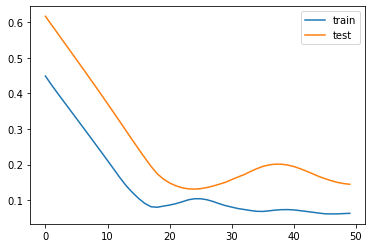

In [11]:
# design network
model = Sequential()
lstm = LSTM(50, input_shape = (train_X.shape[1], train_X.shape[2]))
model.add(lstm)
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [12]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = math.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 5313.445


## Plotting forecast

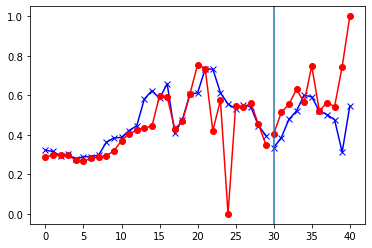

In [13]:
yhatTrain = model.predict(train_X)
plt.plot(range(len(yhatTrain)), yhatTrain, c = 'b', marker = 'x')
plt.plot(range(len(train_y)), train_y, c = 'r', marker = 'o')

plt.plot(range(len(yhatTrain), len(RIO_full) - 1), yhat, c = 'b', marker = 'x')
plt.plot(range(len(train_y), len(RIO_full) - 1), test_y, c = 'r', marker = 'o')
plt.axvline(len(train_y))
plt.show()